In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
np.set_printoptions(precision=3,suppress=True)

In [3]:
org_data=pd.read_csv("auto-mpg.csv")

In [4]:
data = org_data

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
data['horsepower']=data['horsepower'].str.replace('?','0')

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_4684/1554118073.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['horsepower']=data['horsepower'].str.replace('?','0')


In [8]:
data['horsepower']=data['horsepower'].astype('int')

In [9]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<AxesSubplot:xlabel='origin', ylabel='count'>

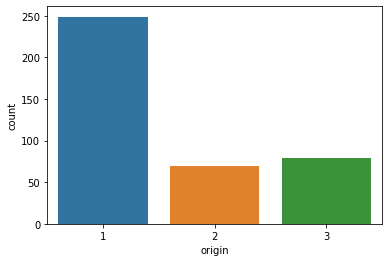

In [12]:
sns.countplot(x="origin",data=data)

In [13]:
data['origin']=data['origin'].map({1:'USA',2:'EUR',3:'JPN'})

In [14]:
data = pd.get_dummies(data,columns=['origin'],prefix='',prefix_sep='')

In [15]:
data.drop('car name',axis=1,inplace=True)

In [16]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,EUR,JPN,USA
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1


In [17]:
train_data = data.sample(frac=0.8,random_state=0)
test_data = data.drop(train_data.index)

In [18]:
#Split Features and Labels

trnfeature = train_data.copy()
tstfeature = test_data.copy()

In [19]:
trnlabel = trnfeature.pop('mpg')
tstlabel = tstfeature.pop('mpg')

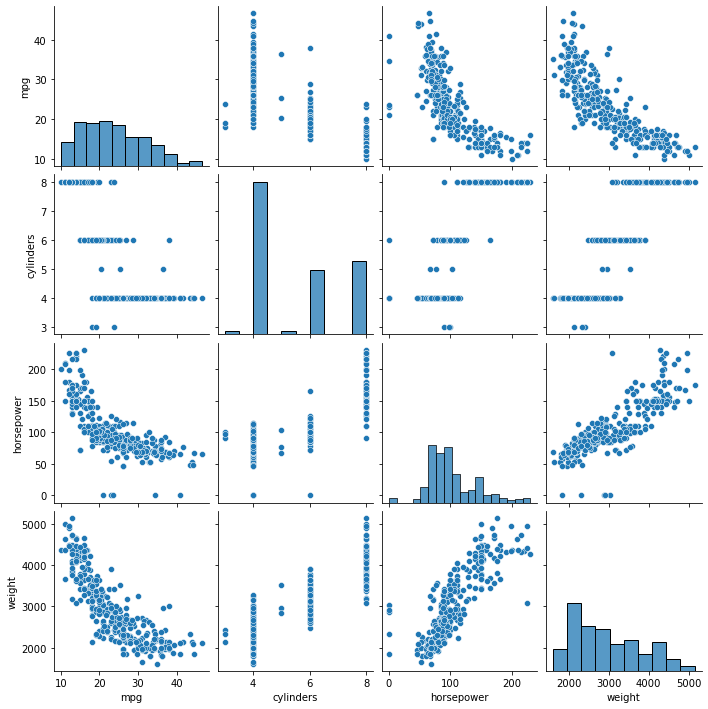

In [20]:
sns.pairplot(train_data[['mpg','cylinders','horsepower','weight']])

In [21]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
horsepower,318.0,102.430818,40.500262,0.0,75.000,90.00,120.00,230.0
weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
model year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
EUR,318.0,0.163522,0.370424,0.0,0.000,0.00,0.00,1.0
JPN,318.0,0.194969,0.396801,0.0,0.000,0.00,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.000,1.00,1.00,1.0


In [22]:
train_data.describe().transpose()[['mean','std']]

,mean,std
mpg,23.590566,7.913617
cylinders,5.427673,1.682941
displacement,193.061321,103.812742
horsepower,102.430818,40.500262
weight,2963.823899,844.749805
acceleration,15.595912,2.796282
model year,75.946541,3.705266
EUR,0.163522,0.370424
JPN,0.194969,0.396801
USA,0.641509,0.480313


In [23]:
#Normalisation Layer
#Build pre-processing into your model using preprocessing.Normalization layer

norm = preprocessing.Normalization(axis=-1)

In [24]:
trnfeature.dtypes

cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
EUR               uint8
JPN               uint8
USA               uint8
dtype: object

In [25]:
norm.adapt(np.array(trnfeature))

In [26]:
norm.mean.numpy()

array([[   5.428,  193.061,  102.431, 2963.824,   15.596,   75.947,
           0.164,    0.195,    0.642]], dtype=float32)

In [27]:
#View the Normalized Data
row1 = np.array(trnfeature[:1])

In [28]:
with np.printoptions(precision=2,suppress=True):
    print('First Row: ',row1)
    print()
    print('Normalized: ',norm(row1).numpy())

First Row:  [[   8.  351.  153. 4129.   13.   72.    0.    0.    1.]]

Normalized:  [[ 1.53  1.52  1.25  1.38 -0.93 -1.07 -0.44 -0.49  0.75]]


### One Input Variable

In [29]:
#Create Normalization Layer

hp = np.array(trnfeature['horsepower'])

In [30]:
hp_norm = preprocessing.Normalization(input_shape=[1,],axis=None)

In [31]:
hp_norm.adapt(np.array(trnfeature['horsepower']))

In [32]:
#Build Sequential Model

hpmodel = tf.keras.Sequential([hp_norm,layers.Dense(units=1)])

In [33]:
hpmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [34]:
#Configure Training Procedures

hpmodel.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [35]:
#Execute the training

history = hpmodel.fit(trnfeature['horsepower'],trnlabel,epochs=100,verbose=0,validation_split=0.2)

In [36]:
#Analyse history object

hist = pd.DataFrame(history.history)

In [37]:
hist['epoch'] = history.epoch

In [38]:
hist.head()

,loss,val_loss,epoch
0,23.179846,23.062740,0
1,22.381605,22.274891,1
2,21.572384,21.478672,2
3,20.770924,20.684088,3
4,19.970470,19.889622,4


In [39]:
hist.tail()

,loss,val_loss,epoch
95,4.125176,3.857719,95
96,4.122667,3.865338,96
97,4.123811,3.866154,97
98,4.129915,3.880911,98
99,4.126241,3.865418,99


In [40]:
def pltloss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    plt.show()

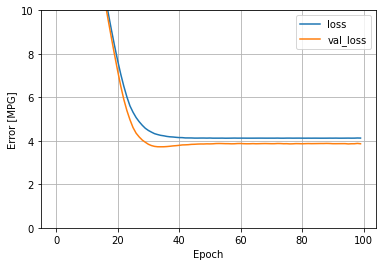

In [41]:
pltloss(history)

In [42]:
#Store the results

tstres = {}
tstres['hp_model']=hpmodel.evaluate(tstfeature['horsepower'],tstlabel,verbose=0)

In [43]:
#Prediction

x = tf.linspace(0.0,250,251)
y = hpmodel.predict(x)

8/8 [==============================] - 0s 3ms/step


In [44]:
def plt_hp(x,y):
    plt.scatter(trnfeature['horsepower'],trnlabel,label='Data')
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

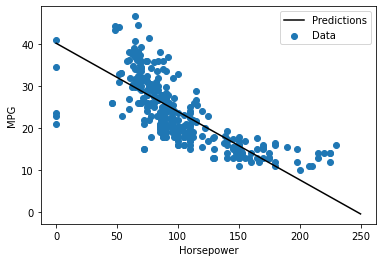

In [45]:
plt_hp(x,y)

### Multiple Input Variables

In [46]:
lm_model = tf.keras.Sequential([norm,layers.Dense(units=1)])

In [47]:
lm_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [48]:
history = lm_model.fit(trnfeature,trnlabel,epochs=100,verbose=0,validation_split=0.2)

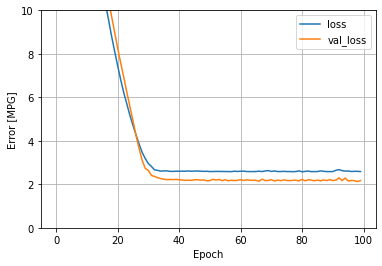

In [49]:
pltloss(history)

In [50]:
#Collect Results - Test Set

tstres['lm_model']=lm_model.evaluate(tstfeature,tstlabel,verbose=0)

### Deep Neural Network - Regression

In [51]:
def nn_model(norm):
    model = keras.Sequential([norm,layers.Dense(64,activation='relu'),layers.Dense(64,activation='relu'),layers.Dense(1)])
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [52]:
nn_hpmodel = nn_model(hp_norm)

In [53]:
nn_hpmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [54]:
#Train the model

history = nn_hpmodel.fit(trnfeature['horsepower'],trnlabel,verbose=0,validation_split=0.2,epochs=100)

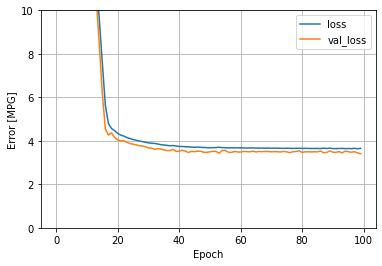

In [55]:
pltloss(history)

8/8 [==============================] - 0s 3ms/step


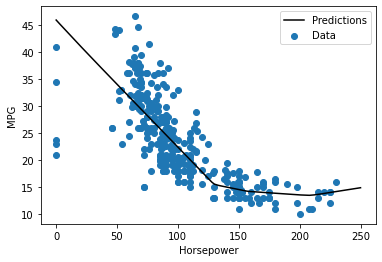

In [56]:
# plot fuel efficiency as a function of horsepower

x = tf.linspace(0.0,250,251)
y = nn_hpmodel.predict(x)
plt_hp(x,y)

In [57]:
tstres['nn_hpmodel']=nn_hpmodel.evaluate(tstfeature['horsepower'],tstlabel,verbose=0)

In [58]:
nn_model = nn_model(norm)

In [59]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [60]:
history = nn_model.fit(trnfeature,trnlabel,verbose=0,validation_split=0.2,epochs=100)

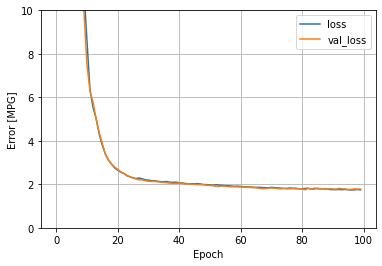

In [61]:
pltloss(history)

In [62]:
tstres['dnn_model'] = nn_model.evaluate(tstfeature,tstlabel,verbose=0)

In [63]:
pd.DataFrame(tstres,index=['Mean absolute error[mpg]']).T

,Mean absolute error[mpg]
hp_model,3.412838
lm_model,2.366377
nn_hpmodel,3.324099
dnn_model,1.978586


### Prediction

In [64]:
tstpred = nn_model.predict(tstfeature).flatten()

3/3 [==============================] - 0s 3ms/step


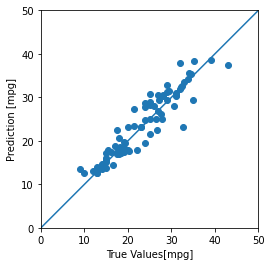

In [65]:
a = plt.axes(aspect='equal')
plt.scatter(tstlabel,tstpred)
plt.xlabel('True Values[mpg]')
plt.ylabel('Prediction [mpg]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
plt.show()

### Error Distribution

In [66]:
error = tstpred-tstlabel

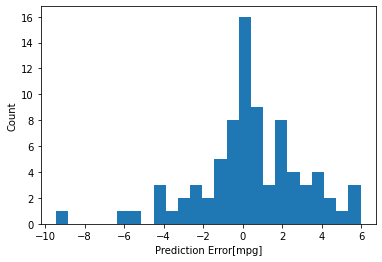

In [67]:
plt.hist(error,bins=25)
plt.xlabel('Prediction Error[mpg]')
_=plt.ylabel('Count')
plt.show()